In [2]:
#importar librerías necesarias
from scipy import stats  #estadística y ciencia de datos
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
np.random.seed(0)

In [4]:
#Generación aleatoria de los datos sesgados
def datos_sesgados(sesgo, cantidad, maximo):
    #distribución normal sesgada
    aleatorios = stats.skewnorm.rvs(sesgo, loc = 2.5, size = cantidad, random_state = 0)
    aleatorios = aleatorios + abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2)/aleatorios.max() * maximo
    return np.round(aleatorios, 1)


In [ ]:
edades = datos_sesgados(3, 100000, 62) #edad productiva
edades

array([38.8, 33.5, 34.2, ..., 34.3, 38.1, 37.4])

In [6]:
edades.min()

19.5

In [7]:
edades.max()

62.0

In [8]:
edades.mean()

33.26179799999999

In [ ]:
# Extracción de una muestra
tamano_muestra = 100
muestra = np.random.choice(edades, tamano_muestra)  # Sacar una muestra a partir de los datos generados
muestra


array([31.5, 34.2, 34.4, 31.1, 34.1, 35.7, 32.9, 40. , 29.1, 36.2, 36.4,
       30.3, 37.8, 31.8, 39.9, 29.9, 28.2, 31.1, 39.2, 41. , 26.7, 31.1,
       27.8, 33.7, 28.3, 35.2, 40.4, 30.7, 34. , 29.2, 42.6, 33.3, 36.1,
       29.7, 31.1, 37.3, 35.1, 36.3, 36.5, 39.9, 30. , 39.1, 37.9, 32.3,
       40.2, 34.2, 36.5, 33.6, 29.2, 45.2, 32.4, 41.9, 36.5, 38.1, 30.7,
       32.9, 33. , 32.1, 31.1, 32.6, 33.1, 32.9, 33.9, 25.9, 25.1, 35.5,
       47.5, 42.5, 33.2, 28.7, 29.3, 34.7, 32.8, 41.9, 36.2, 34.7, 32. ,
       43.8, 33.3, 36.1, 37.7, 35.7, 29. , 42. , 43.8, 30.6, 33.3, 34.2,
       37.6, 37.2, 30.3, 30.6, 30.8, 30.8, 31.4, 29.8, 25.8, 35.3, 34.5,
       29. ])

In [10]:
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(edades, tamano_muestra, replace=True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas


array([[33.6, 30.2, 28.7, ..., 27.6, 36.2, 44.6],
       [29.8, 29.6, 32.5, ..., 34.5, 34.2, 31.6],
       [27. , 27.4, 38.6, ..., 31.1, 32.9, 30.8],
       ...,
       [29.5, 36.9, 29. , ..., 33.3, 31.7, 33.2],
       [34.2, 33.2, 32.7, ..., 31.1, 28.2, 31.4],
       [33.7, 31.4, 31.9, ..., 25. , 34.2, 30.6]])

In [12]:
muestras_generadas.shape

(1000, 100)

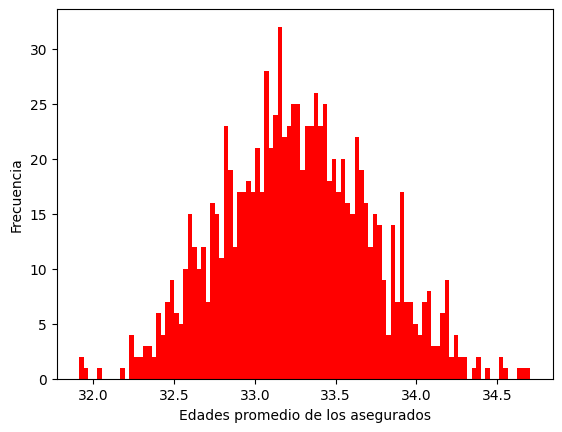

In [14]:
plt.hist(muestras_generadas.mean(axis=1), bins=100, color="red")
plt.xlabel("Edades promedio de los asegurados")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
# Calcular el promedio y el intervalo de confianza del 95%
promedio = muestras_generadas.mean(axis=1).mean()  # Promedio general de las edades
int_confianza = np.quantile(muestras_generadas.mean(axis=1), [0.025, 0.975])  # 2.5% y 97.5% 
int_confianza

array([32.40395 , 34.183125])

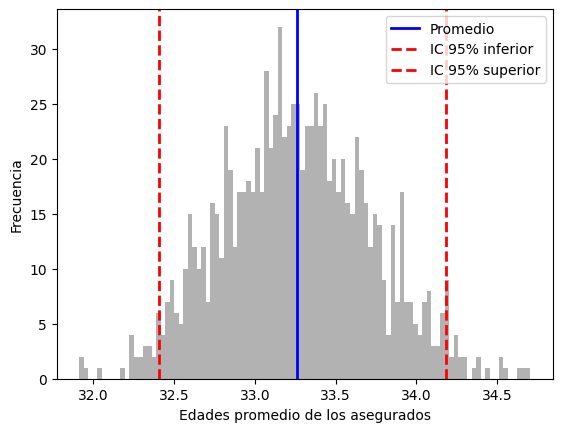

In [ ]:
# Graficar el histograma
plt.hist(muestras_generadas.mean(axis=1), bins=100, color='gray', alpha=0.6)

plt.axvline(promedio, color='blue', linestyle='-', linewidth=2, label='Promedio')
plt.axvline(int_confianza[0], color='red', linestyle='--', linewidth=2, label='IC 95% inferior')
plt.axvline(int_confianza[1], color='red', linestyle='--', linewidth=2, label='IC 95% superior')

plt.xlabel("Edades promedio de los asegurados")
plt.ylabel("Frecuencia")
plt.legend()

plt.show()


In [29]:
muestras_generadas.mean()

33.26307299999999

In [28]:
muestra.mean()

34.218

In [23]:
# Calcular la media de la población (basada en los datos generados de edades)
media_poblacion = np.mean(edades)
print(f"Media de la población: {media_poblacion}")

Media de la población: 33.26179799999999
